In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

In [2]:
data = pd.read_csv("./seloger-cleaned.csv")
data.head()

,id,type_of_logement_raw,ville_raw,quartier_raw,room_nb_raw,bedroom_nb_raw,surface_raw,price_raw
0,0,Maison,Triel sur Seine,Nord et Ouest,8.0,4.0,230.00,630000.0
1,1,Appartement,Verneuil sur Seine,Clairieres,4.0,2.0,75.49,170000.0
2,2,Appartement,Meaux,Croix Saint Loup-Saint Nicolas,4.0,3.0,100.18,409500.0
3,3,Appartement,Carrières-sous-Poissy,Apollinaire,2.0,1.0,31.00,129000.0
4,4,Appartement,NaN,NaN,3.0,2.0,64.00,129000.0


In [3]:
data = data.drop(['id'], axis=1)
data.head()

,type_of_logement_raw,ville_raw,quartier_raw,room_nb_raw,bedroom_nb_raw,surface_raw,price_raw
0,Maison,Triel sur Seine,Nord et Ouest,8.0,4.0,230.00,630000.0
1,Appartement,Verneuil sur Seine,Clairieres,4.0,2.0,75.49,170000.0
2,Appartement,Meaux,Croix Saint Loup-Saint Nicolas,4.0,3.0,100.18,409500.0
3,Appartement,Carrières-sous-Poissy,Apollinaire,2.0,1.0,31.00,129000.0
4,Appartement,NaN,NaN,3.0,2.0,64.00,129000.0


In [4]:
data.isnull().sum()

type_of_logement_raw      0
ville_raw               991
quartier_raw            991
room_nb_raw             175
bedroom_nb_raw          453
surface_raw             188
price_raw                 7
dtype: int64

In [5]:
data["ville_raw"] = data["ville_raw"].fillna('None')
data["quartier_raw"] = data["quartier_raw"].fillna('None')
data["room_nb_raw"] = data["room_nb_raw"].fillna(0)
data["bedroom_nb_raw"] = data["bedroom_nb_raw"].fillna(0)
data["surface_raw"] = data["surface_raw"].fillna(0)
data

,type_of_logement_raw,ville_raw,quartier_raw,room_nb_raw,bedroom_nb_raw,surface_raw,price_raw
0,Maison,Triel sur Seine,Nord et Ouest,8.0,4.0,230.00,630000.0
1,Appartement,Verneuil sur Seine,Clairieres,4.0,2.0,75.49,170000.0
2,Appartement,Meaux,Croix Saint Loup-Saint Nicolas,4.0,3.0,100.18,409500.0
3,Appartement,Carrières-sous-Poissy,Apollinaire,2.0,1.0,31.00,129000.0
4,Appartement,None,None,3.0,2.0,64.00,129000.0
5,Appartement,None,None,4.0,3.0,76.04,139000.0
6,Maison,Sannois,Gabriel Peri,7.0,4.0,185.00,599000.0
7,Appartement,Paris 16,Muette Nord,10.0,5.0,333.00,NaN
8,Maison,Saint-Maur-des-Fossés,Champignol,6.0,4.0,170.00,1238000.0
9,Appartement,None,None,5.0,4.0,128.62,330000.0


In [6]:
data.dropna(subset=['price_raw'],inplace=True)
data.shape

(4991, 7)

In [7]:
df = data.iloc[ : , :-1].values
df

array([['Maison', 'Triel sur Seine', 'Nord et Ouest', 8.0, 4.0, 230.0],
       ['Appartement', 'Verneuil sur Seine', 'Clairieres', 4.0, 2.0,
        75.49],
       ['Appartement', 'Meaux', 'Croix Saint Loup-Saint Nicolas', 4.0,
        3.0, 100.18],
       ...,
       ['Appartement', 'Gagny', 'Gare de Gagny-Henri Barbusse', 0.0, 0.0,
        0.0],
       ['Appartement', 'Chevilly Larue', 'La Guinet', 3.0, 2.0, 62.0],
       ['Appartement', 'Puteaux', 'Bergère-Moulin', 4.0, 3.0, 87.0]],
      dtype=object)

In [8]:
label_encoder = LabelEncoder()

In [9]:
df[ : ,0] = label_encoder.fit_transform(df[ : ,0])
df

array([[1, 'Triel sur Seine', 'Nord et Ouest', 8.0, 4.0, 230.0],
       [0, 'Verneuil sur Seine', 'Clairieres', 4.0, 2.0, 75.49],
       [0, 'Meaux', 'Croix Saint Loup-Saint Nicolas', 4.0, 3.0, 100.18],
       ...,
       [0, 'Gagny', 'Gare de Gagny-Henri Barbusse', 0.0, 0.0, 0.0],
       [0, 'Chevilly Larue', 'La Guinet', 3.0, 2.0, 62.0],
       [0, 'Puteaux', 'Bergère-Moulin', 4.0, 3.0, 87.0]], dtype=object)

In [10]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'Appartement': 0, 'Maison': 1}

In [11]:
df[ : ,1] = label_encoder.fit_transform(df[ : ,1])
df

array([[1, 276, 'Nord et Ouest', 8.0, 4.0, 230.0],
       [0, 282, 'Clairieres', 4.0, 2.0, 75.49],
       [0, 161, 'Croix Saint Loup-Saint Nicolas', 4.0, 3.0, 100.18],
       ...,
       [0, 92, 'Gare de Gagny-Henri Barbusse', 0.0, 0.0, 0.0],
       [0, 45, 'La Guinet', 3.0, 2.0, 62.0],
       [0, 229, 'Bergère-Moulin', 4.0, 3.0, 87.0]], dtype=object)

In [12]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'Achères': 0,
 'Alfortville': 1,
 'Andrésy': 2,
 'Antony': 3,
 'Arcueil': 4,
 'Argenteuil': 5,
 'Arpajon': 6,
 'Asnières-sur-Seine': 7,
 'Athis-Mons': 8,
 'Aubergenville': 9,
 'Aubervilliers': 10,
 'Aulnay-sous-Bois': 11,
 'Auvers-sur-Oise': 12,
 'Bagnolet': 13,
 'Beauchamp': 14,
 'Bessancourt': 15,
 'Beynes': 16,
 'Bezons': 17,
 'Bois le Roi': 18,
 'Bois-Colombes': 19,
 "Bois-d'Arcy": 20,
 'Boissy-Saint-Léger': 21,
 'Bondoufle': 22,
 'Bondy': 23,
 'Bonneuil-sur-Marne': 24,
 'Bougival': 25,
 'Boulogne-Billancourt': 26,
 'Bourg-la-Reine': 27,
 'Brie-Comte-Robert': 28,
 'Brunoy': 29,
 'Bry-sur-Marne': 30,
 'Brétigny-sur-Orge': 31,
 'Bussy-Saint-Georges': 32,
 'Cachan': 33,
 'Carrières-sous-Poissy': 34,
 'Cergy': 35,
 'Chambourcy': 36,
 'Champigny-sur-Marne': 37,
 'Champs-sur-Marne': 38,
 'Chanteloup-les-Vignes': 39,
 'Charenton-le-Pont': 40,
 'Chatou': 41,
 'Chaville': 42,
 'Chelles': 43,
 'Chennevières-sur-Marne': 44,
 'Chevilly Larue': 45,
 'Chevreuse': 46,
 'Chilly-Mazarin': 47,
 'Ch

In [13]:
df[ : ,2] = label_encoder.fit_transform(df[ : ,2])
df

array([[1, 276, 729, 8.0, 4.0, 230.0],
       [0, 282, 224, 4.0, 2.0, 75.49],
       [0, 161, 257, 4.0, 3.0, 100.18],
       ...,
       [0, 92, 350, 0.0, 0.0, 0.0],
       [0, 45, 490, 3.0, 2.0, 62.0],
       [0, 229, 73, 4.0, 3.0, 87.0]], dtype=object)

In [14]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'A, Sisley': 0,
 'Adamville': 1,
 'Agent Sarre-Centre-Les Vallées-La Garenne': 2,
 'Agnettes': 3,
 'Aguado': 4,
 'Alfort': 5,
 'Aligre-Gare de Lyon': 6,
 'Allende': 7,
 'Alleray Procession': 8,
 'Alouettes': 9,
 'Alsace': 10,
 'Amandiers': 11,
 'Amiraux-Simplon-Poissonniers': 12,
 'Anatole France': 13,
 'Anatole France-Lepetit et Vergeat': 14,
 'Ancien Centre Ville': 15,
 'Anjou': 16,
 'Apollinaire': 17,
 'Arche Guedon': 18,
 'Archives': 19,
 'Aristide Briand': 20,
 'Aristide Briand-Champagne': 21,
 'Aristide Briand-Saint Hubert-Plateau': 22,
 'Armée Leclerc-Henri Dunant': 23,
 'Armée Leclerc-Jean Allemane': 24,
 'Arpents-Etang-Vignes': 25,
 'Arsenal': 26,
 'Artistes Lyriques-La Theuillerie': 27,
 'Arts et Métiers': 28,
 'Ascott-Village Ouest-Le Verger': 29,
 'Atlantis-Massy Sud': 30,
 'Aubert': 31,
 'Auguste Geneviève-Benoît Malon': 32,
 'Aunettes Ouest': 33,
 'Auteuil Nord': 34,
 'Auteuil Sud': 35,
 'Avenue Nationale': 36,
 'Avenue du Mantois': 37,
 'Bac-Bécon-Flachat-Colombes': 38,

In [15]:
y = data.price_raw
X = df

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2)

In [17]:
standard_x = StandardScaler()

In [18]:
X_train = standard_x.fit_transform(X_train)
X_val = standard_x.transform(X_val)

In [19]:
print('Train_Shape: ',X_train.shape)
print("\nX_train:")
X_train

Train_Shape:  (3992, 6)

X_train:


array([[-0.74995107,  0.63509075,  0.835376  , -1.03609636, -1.05537643,
        -1.02934841],
       [ 1.33342032,  0.35608135,  0.646075  ,  0.73165518,  0.81681852,
         0.17315025],
       [ 1.33342032, -0.5570403 , -0.31445227, -0.59415847, -0.43131145,
        -0.70953493],
       ...,
       [-0.74995107, -1.47016194,  1.12633864, -0.15222059,  0.19275354,
        -0.35134384],
       [-0.74995107,  0.58436177,  0.9966324 ,  0.28971729,  0.81681852,
         0.43028028],
       [ 1.33342032,  0.35608135,  0.646075  ,  1.17359306,  2.06494849,
         1.72104746]])

In [20]:
print('Val_Shape: ',X_val.shape)
print("\nX_val:")
X_val

Val_Shape:  (999, 6)

X_val:


array([[-0.74995107,  0.67313748, -0.82977165, -1.03609636, -1.05537643,
        -0.80547897],
       [ 1.33342032,  0.99019361, -0.16371259,  2.49940671,  2.06494849,
         1.78501015],
       [ 1.33342032, -1.7111246 ,  0.8213537 ,  2.49940671,  1.44088351,
         1.66910975],
       ...,
       [-0.74995107, -2.01549848, -1.41870808,  0.28971729, -1.67944141,
        -0.17480681],
       [-0.74995107,  1.29456749, -1.35911332, -0.15222059,  0.19275354,
        -0.28738115],
       [-0.74995107,  1.64967036, -1.509853  , -0.59415847, -0.43131145,
        -0.49206177]])

In [22]:
import xgboost
from sklearn.model_selection import GridSearchCV 
#train_x=train[most_relevant_features]
#train_y=train['SalePrice']
#for tuning parameters
parameters_for_testing = {
    'learning_rate':[0.1,0.07],
     'max_depth':[3,5],
     'n_estimators':[10000],
     'reg_alpha':[1e-5, 1e-2,  0.75],
     'reg_lambda':[1e-5, 1e-2, 0.45],
     'subsample':[0.6,0.95],
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_absolute_error')
gsearch1.fit(X_train,y_train)
print (gsearch1.cv_results_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  5.4min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:  9.7min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 10.8min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 13.9min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 16.0min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 19.6min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 25.5min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed: 31.3min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 35.1min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed: 42.0min
[Parallel(

[17:00:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'mean_fit_time': array([ 63.27332783,  61.63695126,  65.80856233,  65.97204623,
        64.84137597,  61.48153744,  63.59387813,  62.84206572,
        67.56808677,  66.78863306,  63.89950418,  61.3623302 ,
        64.0188786 ,  62.02123909,  62.87853971,  62.40205064,
        62.9852592 ,  61.8107625 , 103.73373528, 104.92422924,
       119.81592674, 127.99881477, 121.05766029, 107.3015326 ,
       110.18269353, 107.33533025, 120.29418139, 119.11106915,
       110.46970568, 104.77372851, 104.66225724, 103.12905693,
       106.95661755, 110.43720784, 109.15142441, 107.84242287,
        92.48215718,  84.27322054,  76.33103538,  69.93659124,
        74.53664522,  77.75609779,  70.11393476,  73.64788456,
        83.47347026,  93.25884867,  97.55378528,  91.2795682 ,
        89.50100098,  92.24210901,  84.67299156,  80.65647411,
        78.15356336,  72.53310466, 124.85335689

In [23]:
import xgboost
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 objective ='reg:squarederror',                 
                 learning_rate=0.1,
                 max_depth=5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.01,
                 reg_lambda=1e-05,
                 subsample=0.95,
                 seed=42)

In [24]:
best_xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0.01, reg_lambda=1e-05,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.95,
             verbosity=1)

In [25]:
filename = 'house_model.pkl'

In [26]:
pickle.dump(best_xgb_model, open(filename, 'wb'))

In [27]:
loaded_model = pickle.load(open(filename, 'rb'))

In [28]:
accuracy = loaded_model.score(X_val, y_val)

In [29]:
print(accuracy*100, '%')

81.42146192623905 %


In [30]:
predictions = loaded_model.predict(X_val)

In [31]:
predictions

array([ 3.71298812e+05,  1.38719875e+06,  2.03818225e+06,  1.76083688e+05,
        1.30598906e+05,  3.11512781e+05,  1.84184000e+06,  1.56548172e+05,
        4.90216312e+05,  6.66407812e+05,  3.05697656e+05,  4.39032312e+05,
        8.49620062e+05,  2.77421312e+05,  2.46416266e+05,  5.11379188e+05,
        1.84080031e+05,  3.55551062e+05,  1.72465175e+06,  8.82924625e+05,
        4.61746750e+05,  1.84527812e+06,  1.20744425e+06,  2.62926656e+05,
        1.71927109e+05,  9.69524562e+05,  1.13157912e+06,  2.62677500e+05,
        1.49046953e+05,  1.70367953e+05,  1.24914175e+06,  2.33768219e+05,
        2.40923275e+06,  7.14969938e+05,  1.41754725e+06,  1.79574984e+05,
        4.49518031e+05,  2.85961531e+05,  4.95227000e+05,  1.63988425e+06,
        2.60376203e+05, -7.46867891e+04,  4.58509531e+05,  3.93392812e+05,
        4.34648312e+05,  7.87596562e+05,  9.10537000e+05,  6.85011500e+05,
        2.88620969e+05,  5.12567156e+05,  1.38737425e+06,  5.76967562e+05,
        1.96492000e+05,  

In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, predictions)

135577.74320902934

In [44]:
# pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


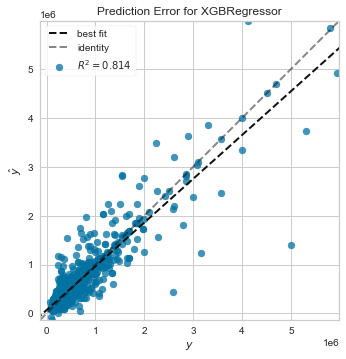

In [46]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(best_xgb_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
visualizer.show()            